# Part II - Understanding Credit worthiness and Borrower Rates
## by Akoh John Ojoarome


## Investigation Overview
>An Exploratory analysis into Prosper loan data for the purpose of uncovering insights and communicating findings through data visualisation.

>Prosper loan isa peer-to-peer lending company based in San Francisco, Carlifornia, which provides a platform for borrowers and lenders to buy and invest in loan financing. The purpose of this analysis is to investigate how explanatory factors such as Credit worthiness, LoanOriginalAmounts and LoanStatuses influence and interact with interest rates.

>In this presenttion, i seek to visually communicate the unusual relationship between CreditScoreRange and BorrowerAPR as seen in the Bivariate violin plot. I look into what factors might be responsible for the avergae BorrowerPR of the Highest CreditScoreRange being Higher than the previous range, despite the negative correlation largely observed between BorrowerAPR and CreditScoreRange.

>I will begin by introducing most of the relevant features in our exploration, their distributions and correlations.


## Dataset Overview
Prosperloandata.csv
>Dataset was Provided for analysis by Udacity as course completion requirement in its Data Analysis Nanodegree.
>The Dataset is a csv file containing 81 features of113937 listed loans, some of which were investigated in this project e.g BorrowerAPR, CreditScoreRange, LoanStatus, LoanOriginalAmount, EmploymentStatus e.t.c

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patheffects as pe

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loanClean = pd.read_csv('cleanloan.csv')

In [3]:
creditscore = loanClean['CreditScoreRange'].unique().tolist().sort()
creditrange = pd.api.types.CategoricalDtype(ordered=True, categories=creditscore)
loanClean['CreditScoreRange'] = loanClean['CreditScoreRange'].astype(creditrange)

In [4]:
# Color palette
colors = sb.color_palette()[2]
# Compute value counts and Proportions
term_counts = loanClean.Term.value_counts()
term_counts_sum = loanClean.Term.value_counts().sum()
max_term_counts = term_counts[0:1]
term_max_prop = max_term_counts/term_counts_sum
rate_counts = loanClean.ProsperRating.value_counts()
credit_counts = loanClean.CreditScoreRange.value_counts()
list_count=loanClean["ListingCategory"].value_counts()
list_order = list_count.index
income_count=loanClean['IncomeRange'].value_counts()
income_order = income_count.index

# Create Sample plots for simple visualisation of the most relevant LoanStatus
loanstatus = ['Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'Past Due (1-15 days)']
loanstatus_DF = loanClean[loanClean['LoanStatus'].isin(loanstatus)]
loanstatus_DF.reset_index(drop=True, inplace=True)
loanstatus_DF['LoanStatus'] = loanstatus_DF['LoanStatus'].astype('object')
print(loanstatus_DF.LoanStatus.unique())
print(loanstatus_DF.shape)

['Current' 'Past Due (1-15 days)' 'Defaulted' 'Completed' 'Chargedoff'
 'FinalPaymentInProgress']
(83592, 19)


## Univarite Exploration of BorrowerAPR

>**Borrower APR** has a multimodal distribution, with peaks around 0.09, 0.2 and 0.3 respectively, With very High peaks between 0.35 and 0.38. Lastly, we can observe very few listings having a 0.4 borrower APR or Higher

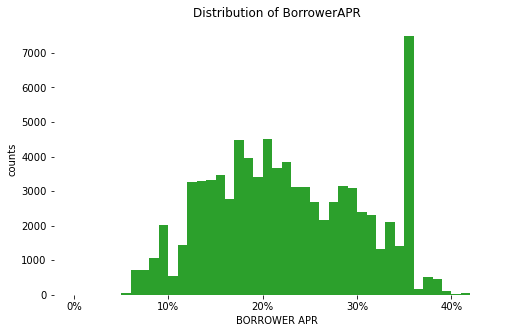

In [5]:
plt.figure(figsize = [8, 5])

# Create bin sizes
bins = np.arange(0, loanClean.BorrowerAPR.max()+0.01, 0.01)
# Plot distribution of BorrowerAPR
plt.hist(data=loanClean, x='BorrowerAPR', bins=bins, color=colors)
plt.xlabel('BORROWER APR')
plt.ylabel('counts')
sb.despine(left=True, bottom=True)
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4], ['0%', '10%', '20%', '30%', '40%'])
plt.title("Distribution of BorrowerAPR");

## Univariate Exploration of CreditScoreRange
>**CreditScoreRange** shows a right skewed distribution having less entries at Higher Credit Ranges, with (660-679) CreditScoreRange having the highest occurence of 16.7%.

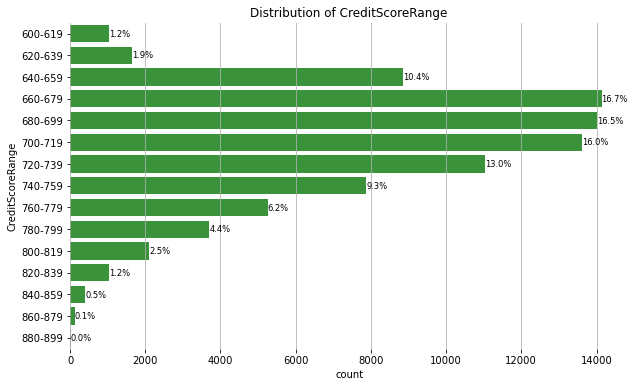

In [6]:
plt.figure(figsize=[10,6])
sb.countplot(data=loanClean, y='CreditScoreRange', color=colors)
sb.despine(bottom=True, left=True)
plt.grid(axis='x')
plt.title('Distribution of CreditScoreRange');

locs, labels = plt.yticks()

for loc, label in zip(locs, labels):
    creditcount = credit_counts[label.get_text()]
    creditpct_str = '{:0.1f}%'.format(100*creditcount/term_counts_sum)
    plt.text(y=loc, x=creditcount, s=creditpct_str, va='center', rotation=360,fontsize='small')

## Univariate Exploration of LoanStatus
>**LoanStatus** 66.7% of Loans are in the Current status, followed closely by completed loans at 23.2%. there is a signifant proportion of Chargedoff and Defaulted Loans, at 6.3% and 1.2% respectively.

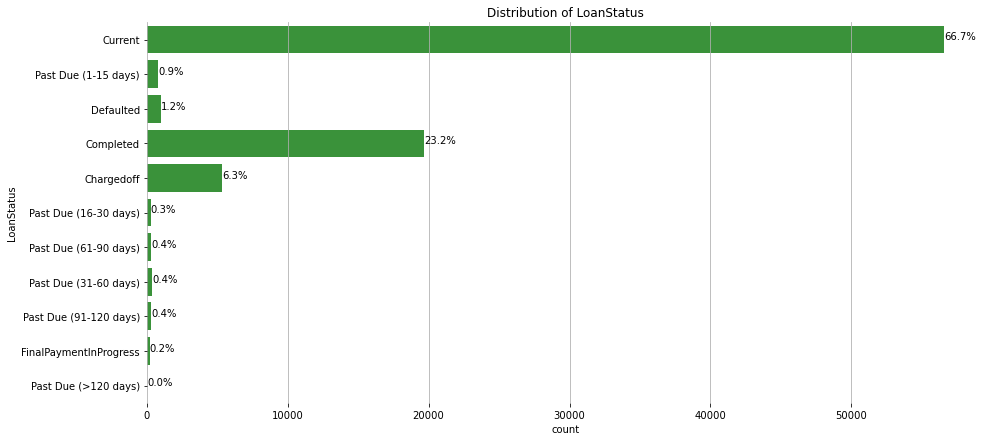

In [7]:
# Plot distribution of loan status
plt.figure(figsize=[15,7])
sb.countplot(data = loanClean, y = 'LoanStatus', color=colors)
sb.despine(bottom=True, left=True)
plt.grid(axis='x')
plt.title('Distribution of LoanStatus');

# Annotate and label chart
loan_count=loanClean["LoanStatus"].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loanClean.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')

## Univariate Exploration of EmploymentStatus
>This exploration shows us that Employed Borrowers made up 79.3% of all loans listed, followed closely by Full-time and Self-Employed. Employed individuals have more incentive to borrow as they are consistently compensated at regular intervals. This encourages lenders to offer affordable loans to this demographic.

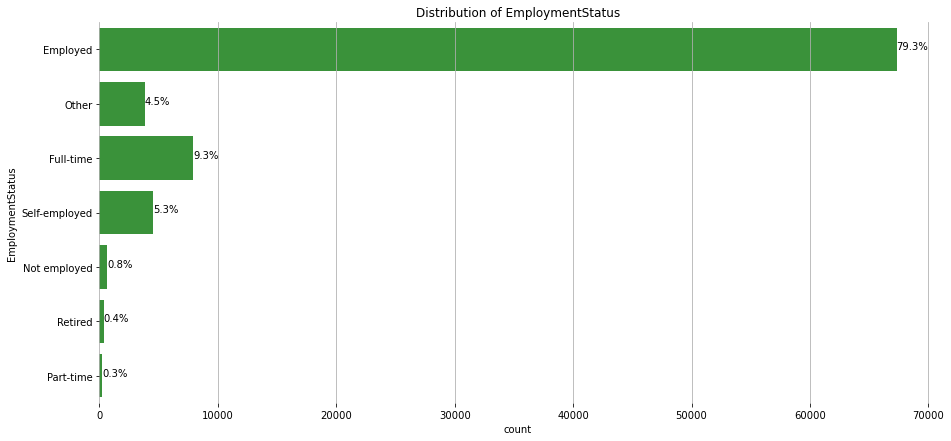

In [8]:
# Plot distribution of Employmentstatus
plt.figure(figsize=[15,7])
sb.countplot(data = loanClean, y = 'EmploymentStatus', color=colors)
sb.despine(bottom=True, left=True)
plt.grid(axis='x')
plt.title('Distribution of EmploymentStatus');

# Annotate and label chart
column_count=loanClean["EmploymentStatus"].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loanClean.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')
    

## Bivariate Exploration of BorrowerAPR and CreditScoreRange

>**CreditScoreRange** generally shows an inverse relationship with BorrowerAPR, Higher CreditScoreRange suggests lower BorrowerAPR, up until the last(Highest) CreditScoreRange where we see the avergae BorrowerAPR begin to reverse the trend



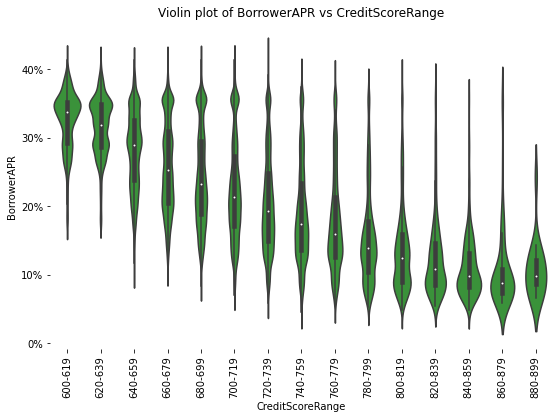

In [9]:
plt.figure(figsize=[9,6])

sb.violinplot(data=loanClean, x='CreditScoreRange', y='BorrowerAPR', color=colors)
plt.title('Violin plot of BorrowerAPR vs CreditScoreRange')
sb.despine(left=True, bottom=True)
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4], ['0%', '10%', '20%', '30%', '40%'])
plt.xticks(rotation=90);

## How was LoanStatuses distributed across CreditScoreRange
>From (600-619) to (660-679) we see higher Proportions of bad loanStatus i.e(Chargedoff, PastDue, Defaulted), with (660-679) having the highest proportion of Past-due loans and Chargedoff loans across all CreditScoreRange. following this, we begin to see a consistent rise in current loans and defaulted loans from (680-699) and beyond aswell as a decline in Chargedoff loans and a gradual rise in Completed loans. with the proportions of Currentloans and defaulted loans closely matching as CreditScoreRanges improves. We also observe that from (720-799) onward, completed loans begin to attain Larger Proportions while enjoying lower Borrower APR, with Completed Loans having the largest proportions across CreditScoreRanges begining from (760-779) and beyond.

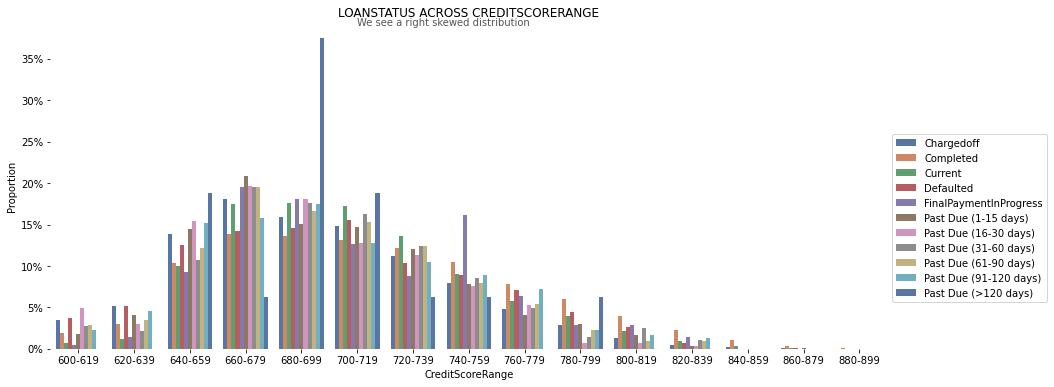

In [10]:
df3 = loanClean.groupby(['LoanStatus', 'CreditScoreRange'])['CreditScoreRange'].count()
df4 = df3.groupby(level=0).apply(lambda x: 100 * x/x.sum()).reset_index(name='Proportion')

# subplot 3: EmploymentStatus vs CreditScoreRange
plt.figure(figsize=[15,6])
sb.barplot(data = df4, hue= 'LoanStatus', x= 'CreditScoreRange',y='Proportion', palette = 'deep')
sb.despine(left=True, bottom=True)
plt.title('LOANSTATUS ACROSS CREDITSCORERANGE')
plt.text(x=5, y=39, color='#555',
         s='''We see a right skewed distribution''')
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35], ['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%'])
plt.legend(loc=6, bbox_to_anchor=(1.0,0.4)); 

## Why does Average BorrowerAPR rise at the Highest CreditScoreRange
>Accross all CreditScoreRanges, we find that Chargedoff loans, defaulted loans and Pastdue loans retain higher levels of BorrowerAPR despite the improvementsin CreditScoreRanges, while Completed loans, current loans and FinalpaymentsinProgress loanStatus maintain lower Levels of BorrowerAPR as CreditScoreRanges Improve. Further down the CreditScoreRanges we see that there is an upward slope just as we observed in the bivariate exploration of (BorrowerAPR vs CreditGrade), in that chart, we saw an upward slope in BorrowerAPR despite an improvement in CreditScoreGrade following the general trend, From this Plot above, we can deduce that the upward slope is due to the prevalence of defunct loanStatus particularly Chargedoff Loans and Defaulted Loans. We also notice that Current Loans in CreditScoreRange (880-899) incurs higher BorrowerAPR than the Prior CreditScoreGrade, Possibly due to smaller LoanAmounts or to discourage over-borrowing.


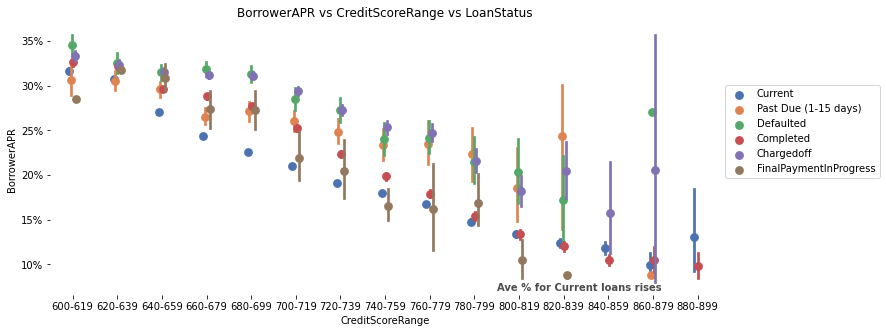

In [11]:
# Plot the levels of LoanStatus across EmploymentStatus and observe it's effect on BorrowerAPR.
# I will only be working with the most importatant LoanStatuss i.e(Chargedoff, Completed, Current, Defaulted, FinalPaymentsinProgress, PastDue(1-15 days))
plt.figure(figsize=[12,5])
sb.pointplot(data=loanstatus_DF, y='BorrowerAPR', x='CreditScoreRange', hue='LoanStatus', dodge=True, linestyles='', palette='deep')
plt.title('BorrowerAPR vs CreditScoreRange vs LoanStatus')
sb.despine(left=True, bottom=True)
plt.text(x=9.5, y=0.07, s='''Ave % for Current loans rises''', fontweight='bold', color='#000', alpha=0.7)
plt.legend(loc=6, bbox_to_anchor=(1.0,0.6))
plt.yticks([0.10, 0.15, 0.20, 0.25, 0.30, 0.35], ['10%', '15%', '20%','25%', '30%', '35%']);

## LoanOriginalAmounts at the Highest CreditScoreRange
>We can also see that Current Loans enjoyed a consistent drop in BorrowerAPR across all CreditScoreRanges up until (880-899), where we see a rise in the BorrowerAPR. We also observe Completed loans enjoys a consistent drop in BorrowerAPR across all CreditRanges. We can deduce that one of the reasons for the median rise in BorrowerAPR at the Highest CreditScoreRange is due to the Large dominance of Bad/delinquent Loans at this stage.

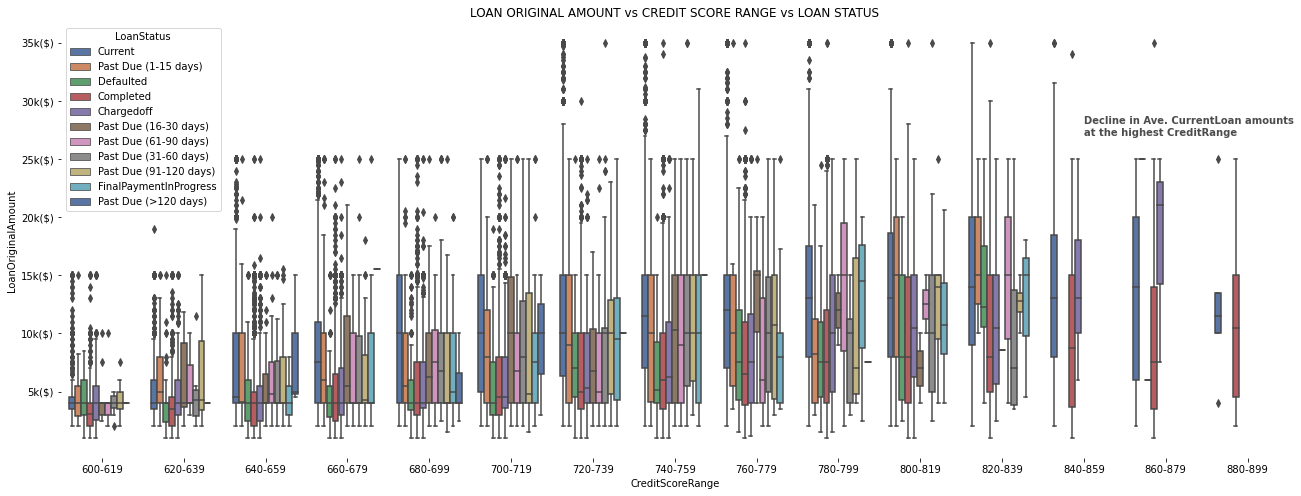

In [12]:
# Plot the interactions with LoanStatus and LoanOriginalAmount across CreditScoreRanges
plt.figure(figsize=[22,8])
sb.boxplot(data=loanClean,x='CreditScoreRange',y='LoanOriginalAmount',hue='LoanStatus', palette='deep')
sb.despine(left=True, bottom=True)
plt.yticks([5000, 10000, 15000, 20000, 25000, 30000, 35000], ['5k($)', '10k($)', '15k($)', '20k($)', '25k($)', '30k($)', '35k($)'])
plt.text(x=12, y=27000, s='''Decline in Ave. CurrentLoan amounts\nat the highest CreditRange''', fontweight='bold', color='#000', alpha=0.7)
plt.title('LOAN ORIGINAL AMOUNT vs CREDIT SCORE RANGE vs LOAN STATUS');

## Conclusion
>We have seen the association amongst our variables of interest, the average BorrowerAPR appeared to be higher at the Highest CreditScoreRange, while having very low range of Current loans, in contrast to the trend we have previously observed.

In [ ]:
!jupyter nbconvert <Part_II_slide_deck_template.ipynb> --to slides --post serve --no-input --no-prompt